**Srayan Gangopadhyay**
*21st May 2020*

# Runge-Kutta method for Lorentz force

## Introducing the code

**0. Overview**

In this code, we use a slightly adapted version of our 4th-order Runge Kutta integrator. We define the Lorentz force equation and integrate it in 3D.

Instead of a 1D array, the integrator now handles data in a matrix (multidimensional array):

![title](table.png)

**1. Required modules**

`numpy` is needed to generate the matrices (arrays) in which we will be holding the solution, as well as to compute the cross product in the Lorentz force equation, and `matplotlib` and `Axes3D` are needed to plot the solution in 3 dimensions.

In [35]:
"""
Using Runge-Kutta method to integrate Lorentz force equation
Srayan Gangopadhyay
2020-05-20
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**2. Setting parameters and defining function**

We need to set the parameters both for the physics (B and E fields, charge, mass) and the maths (initial conditions, step size, end point).

We also define the Lorentz force equation which is to be integrated. The `np.cross` function makes this very simple.

In [36]:
# PARAMETERS
r0 = [0, 0, 0]  # initial position
v0 = [1, 1, 0]  # initial velocity
B = [1, 0, 0]  # magnetic field
E = [0, 0, 0]  # electric field
q, m = 1, 1  # charge, mass
h = 0.05  # step size
end = 10  # t-value to stop integration

def lorentz(vel):  # returns acceleration
    return (q/m)*(E+np.cross(vel, B))

**3. Runge-Kutta integration**

This is the same integrator as before, but with slight adaptations to allow it to work with the three-dimensional vectors instead of a list of scalars. `v[:,i]` refers to the `i`th column of the velocity matrix.

In [37]:
# RUNGE-KUTTA INTEGRATOR
def rk4(func, init1, init2, h, end):
    """
    Takes the RHS of a 2nd-order ODE with initial conditions,
     step size and end point, and integrates using the 4th-order
     Runge-Kutta algorithm. Returns solution in an array.

     r'' = f(t, r, v) where v = r'

     func: the function to be integrated
     init1: value of r at t=0
     init2: value of v at t=0
     h: step size
     end: t-value to stop integrating
    """

    steps = int(end/h)  # number of steps
    r = np.zeros((3, steps))  # empty matrix for solution
    v = np.zeros((3, steps))
    r[:,0] = init1  # inserting initial value
    v[:,0] = init2

    for i in range(0, steps-1):
        k1r = h * v[:,i]
        k1v = h * func(v[:,i])
        k2r = h * (v[:,i] + 0.5*k1v)
        k2v = h * func(v[:,i] + 0.5*k1v)
        k3r = h * (v[:,i] + 0.5*k2v)
        k3v = h * func(v[:,i] + 0.5*k2v)
        k4r = h * (v[:,i] + k3v)
        k4v = h * func(v[:,i] + k3v)
        r[:,i+1] = r[:,i] + (k1r + 2*k2r + 2*k3r + k4r) / 6
        v[:,i+1] = v[:,i] + (k1v + 2*k2v + 2*k3v + k4v) / 6
    return r

**4. Running and plotting**

We then call the integrator on our Lorentz function and plot the result.

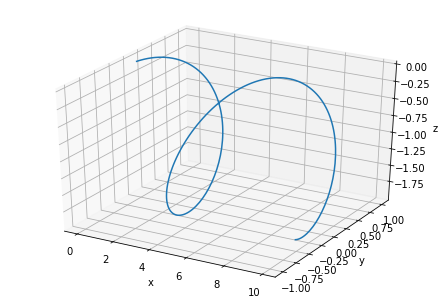

In [38]:
r = rk4(lorentz, r0, v0, h, end)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(r[0], r[1], r[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

With no electric field and a uniform magnetic field in the x-direction, this is the shape we expect.

To check the result further, we can plot the solution in the y-z plane and check the radius - it should be equal to $\frac{mv}{qB} = \frac{1 \times 1}{1 \times 1} = 1$.

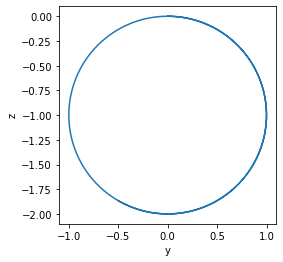

In [39]:
plt.plot(r[1], r[2])  # only plotting y and z
plt.gca().set_aspect('equal')  # forcing a square plot
plt.xlabel('y')
plt.ylabel('z')
plt.show()

Here we can clearly see the unit radius as expected, suggesting that our code is working correctly. We can now explore how changing the initial velocity and magnetic and electric fields affects the trajectory.

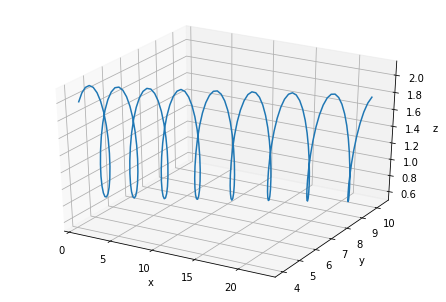

In [40]:
# PARAMETERS
r0 = [1, 4, 2]  # initial position
v0 = [1, 3, 2]  # initial velocity
B = [5, 1, 0]  # magnetic field
E = [0.1, 0.2, 0.8]  # electric field
q, m = 1, 1  # charge, mass
h = 0.05  # step size
end = 10  # t-value to stop integration

r = rk4(lorentz, r0, v0, h, end)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot3D(r[0], r[1], r[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()